<a href="https://colab.research.google.com/github/vlad-gby/ds_5_mini-projects/blob/main/05_image-processing/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Batch Processing Simulation
Scenario: You are working with a dataset of image metadata. Before feeding them into a machine learning model, you need to simulate loading each image based on its specified resolution and then normalize it.

Your Task:

Load the metadata DataFrame.

Write a function that takes a resolution string (e.g., '128x128') as input, parses it to get the height and width, and then creates a random NumPy array of that specific size.

Use the .apply() method to run this function on your resolution column, creating a new image_array column. Each element in this new column should be a NumPy array with the correct dimensions from the resolution column.

Write a second function to normalize an image array and create a final normalized_array column.

In [12]:
import numpy as np
import pandas as pd

image_metadata = {
    'image_id': ['img_001', 'img_002', 'img_003', 'img_004'],
    'label': ['cat', 'dog', 'cat', 'bird'],
    'resolution': ['128x128', '256x256', '128x128', '512x512']
}

metadata = pd.DataFrame(image_metadata)
# Get the dimentions by splitting each string by the "x" character
dimentions = pd.DataFrame(list(metadata['resolution'].str.split('x'))).astype(int)
# Create mock images with noise inside by populating the dimentions provided
# (we have different dimention, so I have to use non-vectorized method .apply)
mock_imgs = dimentions.apply(lambda x: np.random.randint(0, 256, size=(x[0], x[1], 3),dtype=np.uint8), axis=1)
# Normalize data for the model to treat it equally for images with different brightness and contrast
normalized = mock_imgs.apply(lambda img: (img - img.mean()) / img.std())
# Values are not 0 to 1, as normalization in this case means avoiding the bightness and contrast bias, not standartizing the values from 0 to 1
print(normalized)

0    [[[1.5706577716671672, -1.469065935170924, -0....
1    [[[0.0719392193205264, -1.0101862325097097, -0...
2    [[[-0.5014353176495864, 1.522345103091692, 1.2...
3    [[[-1.5075379831093796, -0.3167633559002044, -...
dtype: object


Conclusion: Successful Simulation of an Image Pre-processing Pipeline

This notebook successfully simulates a critical step in a machine learning workflow: preparing image data for a model.

The process involved parsing image metadata, dynamically generating NumPy arrays of varying dimensions to represent the images, and applying a standard normalization function. The final normalized array is ready to be passed to a computer vision model.

This demonstrates the ability to handle complex, nested data structures and perform the essential pre-processing tasks required for machine learning applications.

In [13]:
import requests
from PIL import Image
from io import BytesIO

# Now let's compare how our code normalizes the data from two similar images, but one of them if over-exposed and has low contrast
cat_bright_url = 'https://github.com/vlad-gby/ds_5_mini-projects/blob/main/05_image-processing/cat_over_exposed.png?raw=true'
cat_nice_url = 'https://github.com/vlad-gby/ds_5_mini-projects/blob/main/05_image-processing/cat.png?raw=true'

response_cat_bright = requests.get(cat_bright_url)
img_cat_bright = Image.open(BytesIO(response_cat_bright.content))
array_cat_bright = np.array(img_cat_bright)

response_cat_nice = requests.get(cat_nice_url)
img_cat_nice = Image.open(BytesIO(response_cat_nice.content))
array_cat_nice = np.array(img_cat_nice)

Ok, loaded the images, I'll show you them. Normal one on the left, and the over-exposed one on the right. The goal of our normalization process is to make them "look" the same for the machine learning model. Because we don't want any biases from different exposure in images and different contrast, as those influence the model's performance

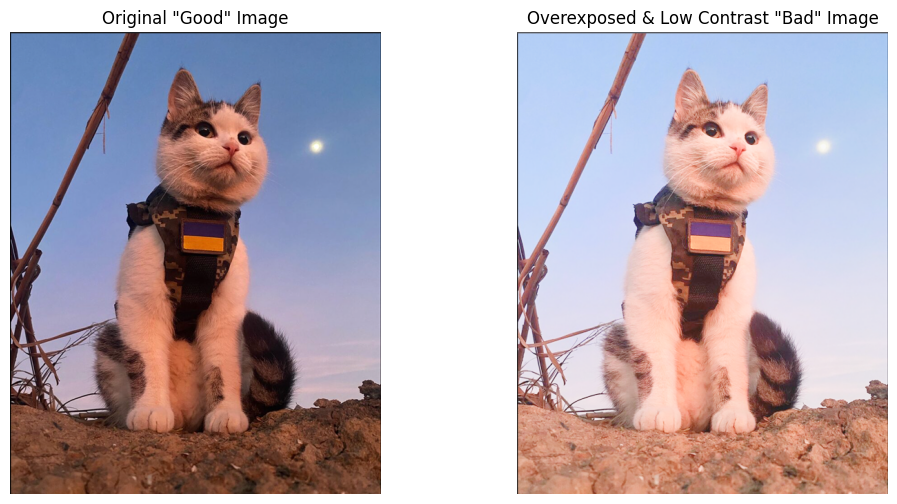

In [14]:
import matplotlib.pyplot as plt

# Create a figure to display the two images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_cat_nice)
axes[0].set_title('Original "Good" Image')
axes[0].axis('off') # Hide the ugly axes

axes[1].imshow(img_cat_bright)
axes[1].set_title('Overexposed & Low Contrast "Bad" Image')
axes[1].axis('off')

plt.show()

In [26]:
# It's a png, and it contains the 4th channel for transparancy - we don't need that
array_cat_bright = array_cat_bright[:, :, :3]
array_cat_nice = array_cat_nice[:, :, :3]
cat_bright_normalized = (array_cat_bright - array_cat_bright.mean()) / array_cat_bright.std()
cat_nice_normalized = (array_cat_nice - array_cat_nice.mean()) / array_cat_nice.std()


So here I will show you the pixel distribution in original images, where you can see how different is it

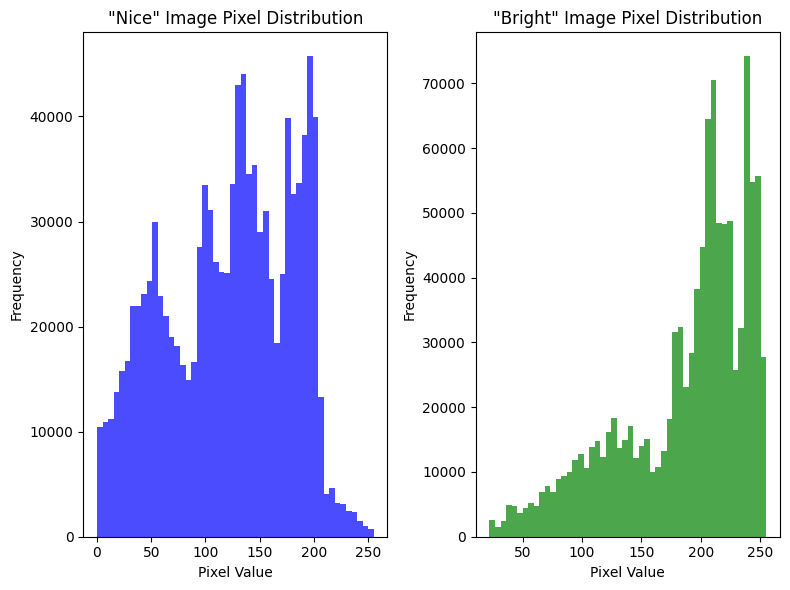

In [28]:
import matplotlib.pyplot as plt

# Flatten the arrays to create histograms
bright_flat = array_cat_bright.flatten()
nice_flat = array_cat_nice.flatten()

# Create the visualization
plt.figure(figsize=(8, 6))

# Histogram for the "nice" image
plt.subplot(1, 2, 1)
plt.hist(nice_flat, bins=50, color='blue', alpha=0.7)
plt.title('"Nice" Image Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Histogram for the bright image
plt.subplot(1, 2, 2)
plt.hist(bright_flat, bins=50, color='green', alpha=0.7)
plt.title('"Bright" Image Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

At the comparison above you can see two histograms that are different, but have somewhat similar form. Both have 3 distinct peaks, and second peak has a "younger brother" on it's left. The problem is in numbers - those peaks don't have the correct distribution along the values on x-axis. As an exmple: first peak is at around 50 at 1st image, and at around 130 at the second; second big peak is at about 130 at 1st image, and at abound 215 at the second.

Remember that those are the same images of a cat, the right one is simply over-exposed and less contrast

So our normalization does exactly that - we subtract the mean and find how many standard deviations is each value from the mean.
And here you can see the normalized histograms:

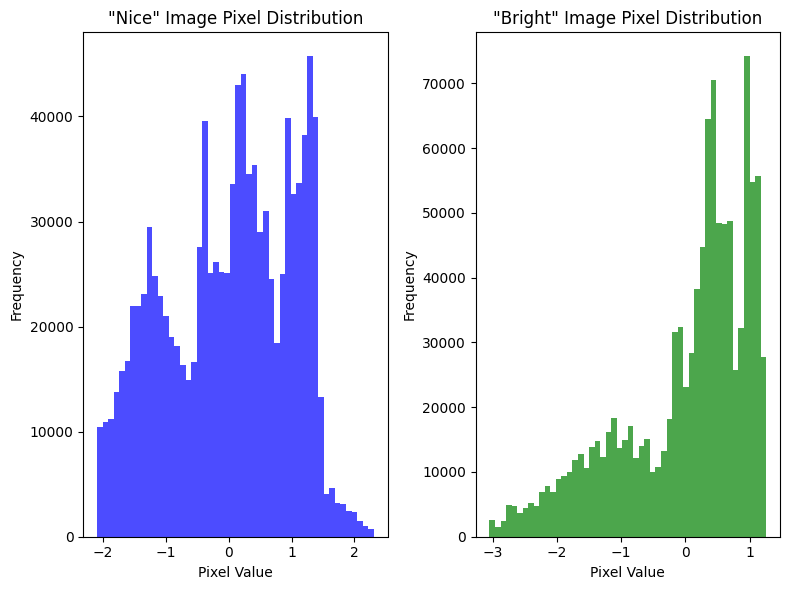

In [29]:
# Flatten the arrays to create histograms
bright_flat = cat_bright_normalized.flatten()
nice_flat = cat_nice_normalized.flatten()

# Create the visualization
plt.figure(figsize=(8, 6))

# Histogram for the "nice" image
plt.subplot(1, 2, 1)
plt.hist(nice_flat, bins=50, color='blue', alpha=0.7)
plt.title('"Nice" Image Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Histogram for the bright image
plt.subplot(1, 2, 2)
plt.hist(bright_flat, bins=50, color='green', alpha=0.7)
plt.title('"Bright" Image Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The shape of histograms is exactly the same, but look at those numbers! Now first peak is consistently a little lower than -1, second is at around 0.3 and the third is at 1 - 1.1. This presentation is much less biased for the model to learn on

But it's still not the perfect match, and I attribute most of the fault on the fact, that over-exposed or under-exposed image simly looses the data. See those tails around the value of 2 on the first image, and around the value of -3 on the second? They are not present visually on both images exacly for the reason, that the whole distribution shifts, and there are only 255 bins for values, not more. So when shifting the values up in order to make the image brighter - we will loose information on the right side of the graph, and vice-versa.

We can't change the shape directly with this method, it's definitely something for me to research on later. But we've treated the most important inconsistency in the graphs - setting them on the same level, which gave us most of the results that we need.

It's like putting two rectangles on each other - without them physically overlapping first, there is no point in trying to tweak the individual shape's angles